# Generating a Word Cloud

For this project, we generate a "word cloud" from a given text file. The script will process the text (should be "utf-8" encoded), remove punctuation, ignore words that do not contain english alphabets, ignore uninteresting or irrelevant words, and count the word frequencies. It then uses the `wordcloud` module to generate the image from the word frequencies.

The input text needs to be a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
You will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**
<br><br>
*Side Note* - Uncomment the lines beginning with `pip install` to make the code work properly. You can alternatively run the `pip install requirements.txt` command as mentioned in the README.md file accompanying the project.

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

# Requirements - already installed in the virtual environment
# !pip install wordcloud
# !pip install fileupload
# !pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing c:\users\arpit\desktop\it automation\word cloud\venv\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\ARPIT\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\ARPIT\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\ARPIT\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok
Matplotlib is building the font cache; this may take a moment.


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `data.txt` (4.52 kB)


The function below does the text processing as described previously.<br>
It removes punctuation, non-alphabetic characters, removes pre-defined uninteresting words, and returns a dictionary containing the word frequencies in the text.
<br><br>
Feel free to tweak the `uninteresting_words` list and include any words that you don't want to see in the final word cloud. Some standard frequently occuring uninteresting words are already added in the list.

In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "in", "on", "one", "not", "he", "she", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
    
    mod_file = ""
    for ind in range(len(file_contents)):
        if file_contents[ind] not in punctuations:
            mod_file += file_contents[ind].lower()
    
    frequencies = {}
    init_list = mod_file.split()
    word_list = []
    for word in init_list:
        if word not in uninteresting_words:
            word_list.append(word)
            
    for word in word_list:
        if word in frequencies:
            frequencies[word] += 1
        else:
            frequencies[word] = 1
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

Run the cell below to generate the final word cloud.
<br><br>
Feel free to download and share the word clouds that you generate!

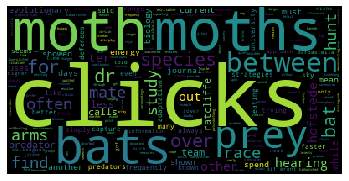

In [4]:
# Display your wordcloud image
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

For the sample, I used text from an article on ["The arms race between bats and moths"](https://www.bbc.com/news/science-environment-11010458) by BBC. The generated word cloud does indeed match the general "feel" of the article. Have a read to confirm!